# LangGraph Platform: remote graph

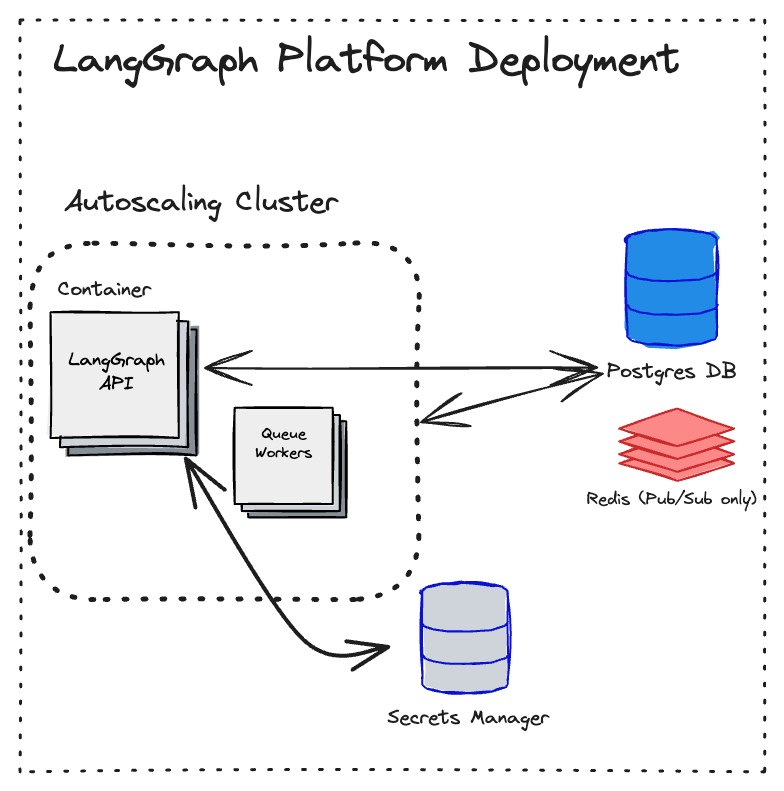

>https://langchain-ai.github.io/langgraph/concepts/langgraph_server/

>https://langchain-ai.github.io/langgraph/concepts/langgraph_standalone_container/

>https://langchain-ai.github.io/langgraph/cloud/deployment/standalone_container/

In [ ]:
from langgraph.pregel.remote import RemoteGraph
from langgraph_sdk import get_sync_client
from langgraph.types import Command

url = "http://127.0.0.1:8000"
graph_name = "main_graph"
sync_client = get_sync_client(url=url)
remote_graph = RemoteGraph(graph_name, url=url)

# create a thread (or use an existing thread instead)
thread = sync_client.threads.create()

# obtain the graph with the thread config
config = {"configurable": {"thread_id": thread["thread_id"]}}

In [ ]:
# Define the input and invoke
user_input = "Hi, could you make a sensitive action?"
message_input = {"messages": [{"role": "human", "content": user_input}]}
for event in remote_graph.stream(message_input, config, stream_mode="updates"):
    print(event)
    print("\n")

In [ ]:
# Continue the action
for event in remote_graph.stream(
    # provide continue
    Command(resume={"action": "continue"}),
    config,
    stream_mode="updates",
):
    print(event)
    print("\n")